<a href="https://colab.research.google.com/github/owl-d/Basic_DeepLearning/blob/main/Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
# GPU 확인

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:
print(device)

cuda:0


In [ ]:
# torchvision 데이터셋의 출력(output)은 [0, 1] 범위를 갖는 PILImage 이미지
# 이를 [-1, 1]의 범위로 정규화된 Tensor로 변환

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 46465138.69it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


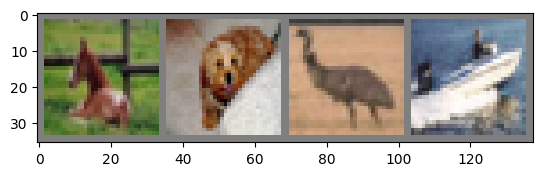

horse dog   bird  ship 


In [ ]:
# 학습용 이미지 시각화

import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# 합성곱 신경망 정의

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # input : 3 channel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# 손실 함수와 옵티마이저 정의

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# 신경망 학습

for epoch in range(10):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후
        inputs, labels = data[0].to(device), data[1].to(device)

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.228
[1,  4000] loss: 1.881
[1,  6000] loss: 1.681
[1,  8000] loss: 1.581
[1, 10000] loss: 1.521
[1, 12000] loss: 1.483
[2,  2000] loss: 1.420
[2,  4000] loss: 1.389
[2,  6000] loss: 1.352
[2,  8000] loss: 1.338
[2, 10000] loss: 1.327
[2, 12000] loss: 1.310
[3,  2000] loss: 1.230
[3,  4000] loss: 1.226
[3,  6000] loss: 1.226
[3,  8000] loss: 1.216
[3, 10000] loss: 1.214
[3, 12000] loss: 1.181
[4,  2000] loss: 1.097
[4,  4000] loss: 1.138
[4,  6000] loss: 1.114
[4,  8000] loss: 1.116
[4, 10000] loss: 1.127
[4, 12000] loss: 1.109
[5,  2000] loss: 1.042
[5,  4000] loss: 1.061
[5,  6000] loss: 1.074
[5,  8000] loss: 1.031
[5, 10000] loss: 1.050
[5, 12000] loss: 1.030
[6,  2000] loss: 0.960
[6,  4000] loss: 0.992
[6,  6000] loss: 1.009
[6,  8000] loss: 0.986
[6, 10000] loss: 0.988
[6, 12000] loss: 0.969
[7,  2000] loss: 0.913
[7,  4000] loss: 0.911
[7,  6000] loss: 0.935
[7,  8000] loss: 0.959
[7, 10000] loss: 0.962
[7, 12000] loss: 0.946
[8,  2000] loss: 0.867
[8,  4000] 

In [ ]:
# 학습한 모델 정의

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

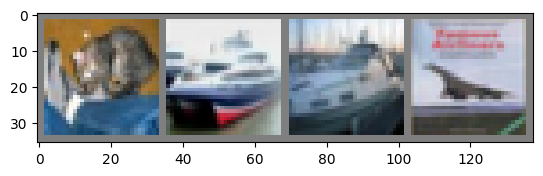

GroundTruth:  cat   ship  ship  plane


In [ ]:
# 테스트 데이터셋으로 학습한 신경망 검사

dataiter = iter(testloader)
images, labels = next(dataiter)

# 테스트용 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
# 저장했던 모델 불러오기

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
# 신경망 예측 결과 확인

outputs = net(images)

In [ ]:
# 출력은 10개 클래스 각각에 대한 값으로 나타낸다. 가장 높은 값의 인덱스가 예측값이다.

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  plane plane


In [ ]:
# 전체 데이터셋에 대해서 확인

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 63 %


In [ ]:
# 각 클래스 별로 정확도 확인

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 72.9 %
Accuracy for class: car   is 84.1 %
Accuracy for class: bird  is 47.6 %
Accuracy for class: cat   is 49.4 %
Accuracy for class: deer  is 61.9 %
Accuracy for class: dog   is 37.6 %
Accuracy for class: frog  is 76.8 %
Accuracy for class: horse is 67.1 %
Accuracy for class: ship  is 70.3 %
Accuracy for class: truck is 65.0 %
